In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [8]:
# Step 2: XOR input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [9]:
model = keras.Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
optimizer = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mse')

In [11]:
# Step 5: Callback to record learning rates
class LearningRateCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        Learning_rates.append(lr)



In [12]:
Converged = False
Target_loss = 0.001
Losses = []
Learning_rates = []

while not Converged:
    history = model.fit(X, y, epochs=10, verbose=0, callbacks=[LearningRateCallback()])
    loss = history.history['loss'][0]
    Losses.append(loss)
    if loss < Target_loss:
        Converged = True

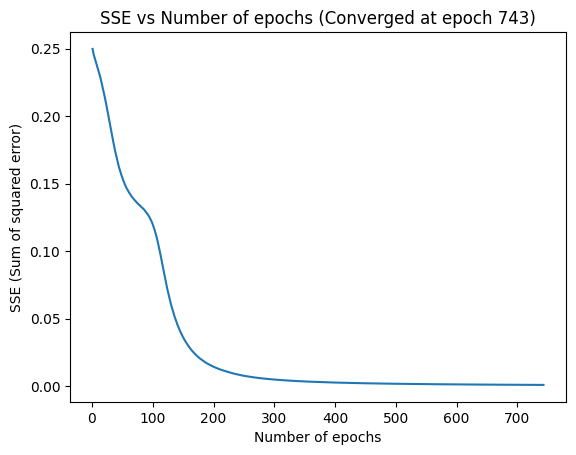

In [13]:
# Step 7: Plot SSE vs Number of epochs
plt.figure()
plt.plot(range(1, len(Losses) + 1), Losses)
plt.xlabel('Number of epochs')
plt.ylabel('SSE (Sum of squared error)')
plt.title('SSE vs Number of epochs (Converged at epoch {})'.format(len(Losses)))
plt.show()

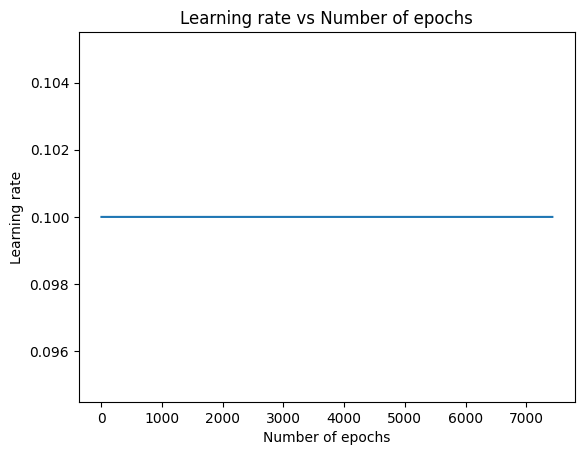

In [14]:
# Step 8: Plot learning rate vs Number of epochs
plt.figure()
plt.plot(range(1, len(Learning_rates) + 1), Learning_rates)
plt.xlabel('Number of epochs')
plt.ylabel('Learning rate')
plt.title('Learning rate vs Number of epochs')
plt.show()

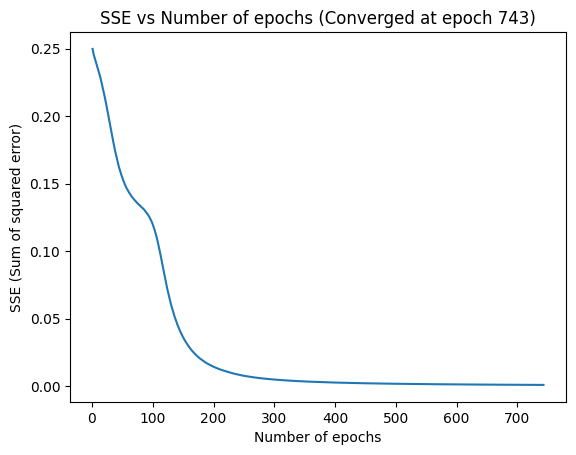

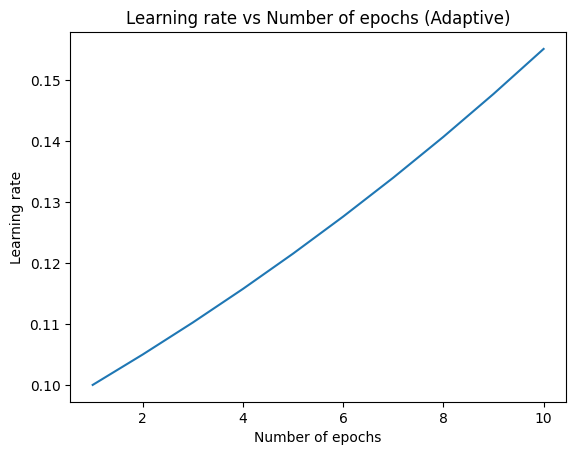

In [15]:
# Step 9: Adaptive Based Learning Rate
num_epochs = 50
decay_rate = 0.7
increase_rate = 1.05
epoch_counter = 0
prev_loss = float('inf')
Learning_rates_adaptive = []

while epoch_counter < num_epochs:
    history = model.fit(X, y, epochs=5, verbose=0, callbacks=[LearningRateCallback()])
    loss = history.history['loss'][0]
    Learning_rates_adaptive.append(model.optimizer.lr.numpy())

    if loss > prev_loss * 1.04:
        model.optimizer.lr = model.optimizer.lr * decay_rate
    else:
        model.optimizer.lr = model.optimizer.lr * increase_rate

    prev_loss = loss
    epoch_counter += 5

plt.figure()
plt.plot(range(1, len(Losses) + 1), Losses)
plt.xlabel('Number of epochs')
plt.ylabel('SSE (Sum of squared error)')
plt.title('SSE vs Number of epochs (Converged at epoch {})'.format(len(Losses)))
plt.show()

plt.figure()
plt.plot(range(1, len(Learning_rates_adaptive) + 1), Learning_rates_adaptive)
plt.xlabel('Number of epochs')
plt.ylabel('Learning rate')
plt.title('Learning rate vs Number of epochs (Adaptive)')
plt.show()


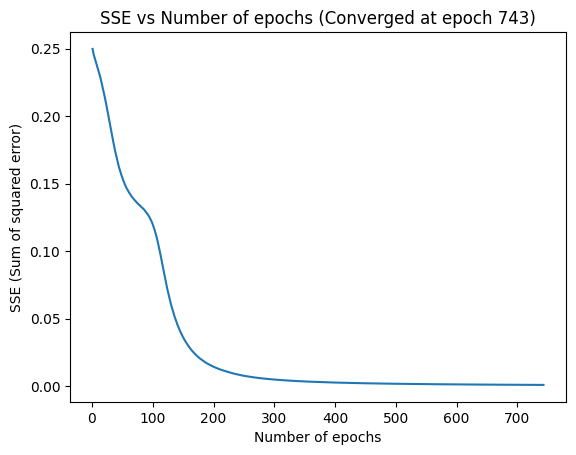

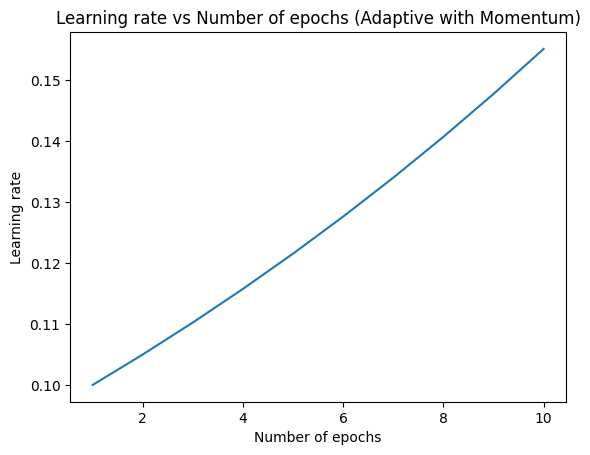

In [16]:
# Step 10: Adaptive Based Learning Rate with Momentum
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.9), loss='mse')

num_epochs = 50
decay_rate = 0.7
increase_rate = 1.05
epoch_counter = 0
prev_loss = float('inf')
Learning_rates_adaptive_momentum = []

while epoch_counter < num_epochs:
    history = model.fit(X, y, epochs=5, verbose=0, callbacks=[LearningRateCallback()])
    loss = history.history['loss'][0]
    Learning_rates_adaptive_momentum.append(model.optimizer.lr.numpy())

    if loss > prev_loss * 1.04:
        model.optimizer.lr = model.optimizer.lr * decay_rate
    else:
        model.optimizer.lr = model.optimizer.lr * increase_rate

    prev_loss = loss
    epoch_counter += 5

plt.figure()
plt.plot(range(1, len(Losses) + 1), Losses)
plt.xlabel('Number of epochs')
plt.ylabel('SSE (Sum of squared error)')
plt.title('SSE vs Number of epochs (Converged at epoch {})'.format(len(Losses)))
plt.show()

plt.figure()
plt.plot(range(1, len(Learning_rates_adaptive_momentum) + 1), Learning_rates_adaptive_momentum)
plt.xlabel('Number of epochs')
plt.ylabel('Learning rate')
plt.title('Learning rate vs Number of epochs (Adaptive with Momentum)')
plt.show()


QUESTIONS
    1. How does a multilayer neural network solve the XOR problem?
    2. In a backpropagation neural network, why are the middle layers called “hidden”?
    3. How are hyperparameters different from model parameters?
    4. Explain the concept of accelerated learning in backpropagation.
    5. What are two heuristics applied in adaptive learning rate?

1. A multilayer neural network solves the XOR problem by learning non-linear combinations of the input features. The hidden layer(s) enable the network to learn complex patterns and relationships in the data.

2. The middle layers in a backpropagation neural network are called "hidden" because they are not directly observable in the input or output of the network.
3. - Hyperparameters are settings that are specified before the learning process begins and determine how the model is trained. They are not learned from the data but rather set by the user.
   - Model parameters, on the other hand, are learned from the data during the training process. These parameters include the weights and biases of the neural network.
4. Accelerated learning in backpropagation refers to techniques that aim to speed up the convergence of the learning process. One common technique is momentum, which introduces a velocity term that helps the learning algorithm to navigate through the error surface more efficiently, especially in cases where the surface is rugged or has many local minima.
5. 1. Learning Rate Schedules.
  2.  Adaptive Methods